# COVID-19 sequence analysis

### COVID-19 is a ss-RNA virus and there is a cDNA sequence available. This short project explores some information contained in the sequence.

**Imported the software (Biopython) required to analyse the sequence.**

After installing Biopython, we imported SeqIO

The FASTA file was saved in the same directory and this file format is specified in the SeqIO.parse.

In [2]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.


SeqIO is a sub-package within Biopython

In [3]:
from Bio import SeqIO

**Downloaded cDNA sequence and anlaysed the sequence which turns the letters into a string, counting each letter as a nucleotide.**

 The str(len()) function takes a string as an argument (sequence here) and returns its length in nucleotides.

**Using sequence data from https://www.nature.com/articles/s41586-020-2008-3**

The genome was sequenced from a bronchoalveolar lavage fluid sample taken from a worker on 26th December 2019.

In [4]:
for sequence in SeqIO.parse("MN908947.fna", "fasta"):
    print('Id: '  + sequence.id + '\nSize: ' + str(len(sequence))+' nucleotides')

Id: MN908947.3
Size: 29903 nucleotides


The output here shows the sequence length is 29,903 nucleotides.

**This step converts the .fna file into a sequence that can be displayed in Python.**

SeqRecord is a sub-module within the Biopython package. A SeqRecord object holds a sequence and information about it.

In [5]:
from Bio.SeqRecord import SeqRecord

In [6]:
DNAseq = SeqIO.read("MN908947.fna", "fasta")

In [35]:
DNA = DNAseq.seq
print(DNA[:200])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT


This displays the first 200 nucleotides within the sequence.

**The initial sequence file was a string so it was converted to a list in order to count the contents.**

In [8]:
dna_list = list(DNA)

This section calculates the number of each nucleotide within the sequence and prints each respective letter into a separate dataframe.

In [50]:
count_DNA = DNA
nucleotides={}
for n in count_DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

n_count = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
n_count = n_count.rename(columns={0: 'frequency', 'index': 'nucleotides'})
n_count = n_count.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


The dataframe containing each set of nucleotides was then used to create a graph for visual representation.

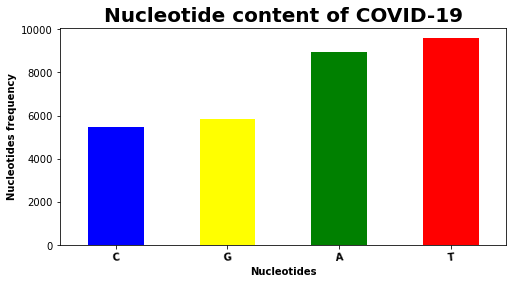

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
a= n_count['frequency'].plot.bar(color= ['blue', 'yellow', 'green', 'red'])
plt.xticks(rotation=5)
plt.ylabel("Nucleotides frequency", weight='bold')
r=list(range(len(n_count)))
plt.xticks(r, n_count.nucleotides, weight='bold')
plt.xlabel("Nucleotides", weight='bold')
plt.title("Nucleotide content of COVID-19", weight='bold', size=20)
plt.show()

**We can see from the graph that the GC content is lower than 50%. We have created a module to calculate the percentage GC content below.** 

In [10]:
import GC_content 

In [15]:
Percent = round(GC_content.GC_content(dna_list))

In [16]:
print(f'The percentage GC content is {Percent} %')

The percentage GC content is 38 %


**mRNA sequence was obtained using Biopython function.transcribe which converts our cDNA into mRNA.**

In [23]:
mRNA = DNA.transcribe()

In [36]:
print(mRNA[:200])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGU


The cDNA sequence has been correctly converted to an mRNA sequence (U instead of T).

Without removal of the Poly A tail, a warning appeared in trying to translate the mRNA into an amino acid sequence as the length was not divisible by 3. However, this method has not accounted for other post-translational modifications. Something to explore ?

In [26]:
Less_polyA = mRNA.rstrip("A")

In [31]:
print("Length of mRNA minus Poly A tail:",len(Less_polyA))

Length of mRNA minus Poly A tail: 29870


**The mRNA sequence was then translated into amino acids.**

In [27]:
Amino_Acid = Less_polyA.translate()

In [37]:
print(Amino_Acid[:200])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCG


In [29]:
print("Length of Protein:",len(Amino_Acid))

Length of Protein: 9956


Identification of proteins from amino acid sequence. This separates the polypeptides at the stop codons, indicated by "*". 

In [74]:
Proteins = Amino_Acid.split('*')
print(Proteins[:10])

[Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG')]


**The smallest known functional proteins are 20 amino acids in length so all the chains shorter than this can be removed:**

In [75]:
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

**The protein sequences can be converted into a dataframe to better visualise the sequences.**

In [76]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro= pro.sort_values(by=['Protein length'], ascending=False)

In [77]:
pro

,amino acid sequence,Protein length
48,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
61,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
68,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
62,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
67,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
...,...,...
72,PEWRTQWGAIKTTSAPRFTQ,20
39,LLRCSYNCHVFGQRYCFYVC,20
19,FKNYRRGWPHRSNGCLCRQF,20
22,MGFNCFWLSCRVVFGIYSFH,20


**These sequences can now be matched with online databases (BLAST) to identify the proteins.**